In [1]:
N = [10**5,10**7,10**9]

K =[ 1, 2, 4, 8, 16]

In [2]:
import threading
import numpy as np
import time
import matplotlib.pyplot as plt


In [3]:
def lista_numeros(qntd):
    numeros = np.random.randint(-50,50,qntd)
    return numeros

In [4]:
def somando(lock, qntd):
    global soma
    
    numeros = lista_numeros(qntd)
    for i in numeros:
        lock.acquire()
        soma = soma + i
        lock.release()
    

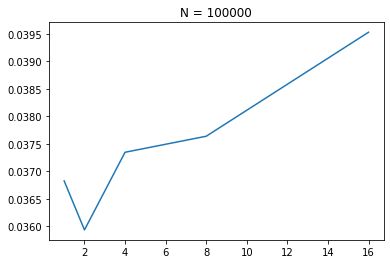

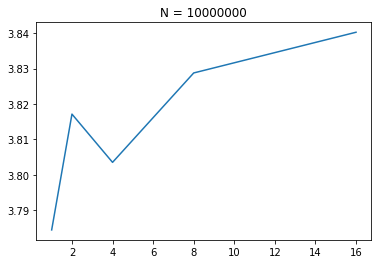

KeyboardInterrupt: ignored

In [5]:
for n in N:
    medias=[]
    for k in K:  
    
        tempo=[]
        for j in range(20):
            lista_threads = []
            inicio=time.time()
            for i in range(k): 
                
                soma = 0
                lock = threading.Lock()
                qntd = int(n/k)
                th = threading.Thread(target=somando, args=(lock, qntd))
                lista_threads.append(th)
                

            for th in lista_threads:
                th.start()

            for th in lista_threads:
                th.join()
            
            fim = time.time()
            dif = fim-inicio
            tempo.append(dif)
            x=0
        for t in tempo:
            x = x+t
        med=x/20
        medias.append(med)
    
    plt.plot(K,medias)
    plt.title('N = '+ str(n))
    plt.show()